In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import control as ctrl
import vibrationtesting as vt


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
sys = vt.so2ss(np.array([[1]]),np.array([[1]]),np.array([[1000]]),
               np.array([[1]]),np.array([[1]]), np.array([[0]]), np.array([[0]]))

In [47]:
sys = ctrl.ss(*sys)
sys

A = [[    0.     1.]
 [-1000.    -1.]]

B = [[ 0.]
 [ 1.]]

C = [[ 1.  0.]]

D = [[ 0.]]

In [49]:
vt.damp(sys.A)

............... Eigenvalue ...........     Damping     Frequency
--------[re]---------[im]--------[abs]----------------------[Hz]
      -0.500        +31.619      31.623                         0.016         5.033
      -0.500        -31.619      31.623                         0.016         5.033


In [50]:
U = np.zeros((1,1000))
U[0,0]=1


In [54]:
U.shape

(1, 1000)

In [51]:
X0=np.array([[0],[0]])
X0

array([[0],
       [0]])

In [117]:
T = np.linspace(0,5,1000)
T.shape

(1000,)

In [97]:
yout, T, xout = ctrl.lsim(sys,U.T,T,X0)

In [126]:
T, yout, xout = ctrl.forced_response(sys,U=U,T=T,X0=X0)

In [127]:
xout.shape

(2, 1000)

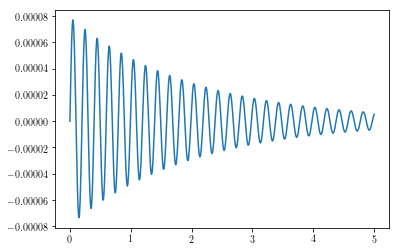

In [129]:
plt.plot(T,yout)

In [66]:
yout.shape

(1000,)

In [67]:
xout.shape

(1000, 2)

In [114]:
T, yout, xout = ctrl.impulse_response(sys, T = T)

ValueError: Parameter ``T``: time values must be equally spaced.

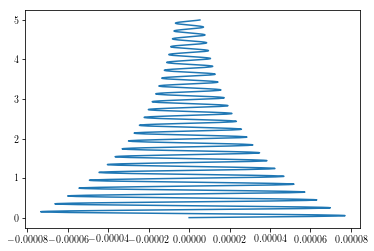

In [115]:
plt.plot(T, yout)

In [3]:
a = np.linspace(0,10,1024).reshape(1,-1)

In [47]:
force = vt.hammer_impulse(a, doublehit=True)

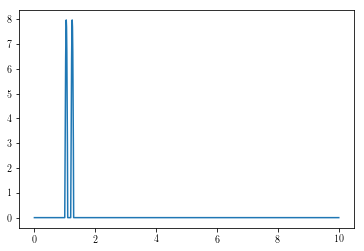

In [48]:
plt.plot(a.T,force.T)
#plt.axis([.99,1.15,0,1])

In [37]:
import scipy.integrate as spi

In [43]:
time = a

In [46]:
spi.simps(force.reshape(-1),dx = a[0,1])

0.12547438655139989

In [42]:
a[0,0]

0.0

In [45]:
force.reshape(-1)

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [ ]:
import scipy as sp

In [57]:
help(sp.signal.filtfilt)

Help on function filtfilt in module scipy.signal.signaltools:

filtfilt(b, a, x, axis=-1, padtype='odd', padlen=None, method='pad', irlen=None)
    Apply a digital filter forward and backward to a signal.
    
    This function applies a linear digital filter twice, once forward and
    once backwards.  The combined filter has zero phase and a filter order
    twice that of the original.
    
    The function provides options for handling the edges of the signal.
    
    Parameters
    ----------
    b : (N,) array_like
        The numerator coefficient vector of the filter.
    a : (N,) array_like
        The denominator coefficient vector of the filter.  If ``a[0]``
        is not 1, then both `a` and `b` are normalized by ``a[0]``.
    x : array_like
        The array of data to be filtered.
    axis : int, optional
        The axis of `x` to which the filter is applied.
        Default is -1.
    padtype : str or None, optional
        Must be 'odd', 'even', 'constant', or None.  

In [56]:
help(sp.signal.decimate)

Help on function decimate in module scipy.signal.signaltools:

decimate(x, q, n=None, ftype='iir', axis=-1, zero_phase=True)
    Downsample the signal after applying an anti-aliasing filter.
    
    By default, an order 8 Chebyshev type I filter is used. A 30 point FIR
    filter with Hamming window is used if `ftype` is 'fir'.
    
    Parameters
    ----------
    x : array_like
        The signal to be downsampled, as an N-dimensional array.
    q : int
        The downsampling factor. When using IIR downsampling, it is recommended
        to call `decimate` multiple times for downsampling factors higher than
        13.
    n : int, optional
        The order of the filter (1 less than the length for 'fir'). Defaults to
        8 for 'iir' and 20 times the downsampling factor for 'fir'.
    ftype : str {'iir', 'fir'} or ``dlti`` instance, optional
        If 'iir' or 'fir', specifies the type of lowpass filter. If an instance
        of an `dlti` object, uses that object to filter